# Red Neuronal Profunda (DNN) para clasificación MNIST

Aplicaremos todos nuestros conocimientos para crear una DNN, frecuentemente llamada también una Artificial Neural Network (ANN).  El problema que vamos a trabajar se conoce como el "Hola Mundo" del aprendizaje profundo porque para la mayoría de estudiantes este es el primer algoritmo de aprendizaje profundo que ven. 

El conjunto de datos se llama MNIST y se refiere al reconocimiento de dígitos escritos a mano.  Pueden encontrar más información en el sitio web de Yann LeCun (Director of AI Research, Facebook).  El es uno de los pioneros de todo este tema, así como de otras metodologías más complejas como las Redes Neurales Convolucionales (CNN) que se utilizan hoy día.

El conjunto de datos tiene 70,000 imágenes (28x28 pixels) de dígitos escritos a mano (1 dígito por imagen).

La meta es escribir un algoritmo que detecta qué dígito ha sido escrito.  Como solo hay 10 dígitos (0 al 9), este es un problema de clasificación con 10 clases.

Nuestra meta será construir una RN con 2 capas escondidas.

## Plan de Acción para preparar el modelo

1.  Preparar los datos y preprocesarlos.  Crear los conjuntos de datos para entrenar, validar y probar
2.  Crear un esboso del modelo y seleccionar las funciones de activación
3.  Fijar los optimizadores avanzados y la función de pérdida
4.  Hacer que el modelo aprenda
5.  Probar la exactitud ("accuracy") del modelo

## Importar los paquetes relevantes

TensorFlow incluye un proveedor de los datos de MNIST que utilizaremos acá.  Viene con el módulo **"tensorflow.tf.datasets"**. 

In [22]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import pandas as pd

La siguiente instrucción, cuando se corre por primera vez, descarga el conjunto de datos en lo indicado por el parámetro path, relativo a  ~/.tf/datasets).  Como si se hubiera ejecutado Lo siguiente:

tf.keras.datasets.mnist.load_data(
    path = 'mnist.npz'
)

luego separa los datos en un conjunto para entrenamiento y otro para pruebas.

Si se ejecuta más de una vez, ya no descarga el archivo.

In [23]:
(X_entreno, y_entreno), (X_prueba, y_prueba) = tf.keras.datasets.mnist.load_data()


In [24]:
X_entreno

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Como no podemos ver la forma de los conjuntos...les queda de tarea averiguar por qué no...podemos utilizar la instrucción **assert**

In [25]:
assert X_entreno.shape == (60000, 28, 28)
assert X_prueba.shape == (10000, 28, 28)
assert y_entreno.shape == (60000,)
assert y_prueba.shape == (10000,)

## Datos

Esta sección es donde pre-procesaremos nuestros datos.

Por default, TF2 tiene conjuntos de datos de entrenamiento y de prueba, pero no tiene un conjunto de validación, por lo que debemos dividirlo por nuestra cuenta

Lo haremos del mismo tamaño que el conjunto de prueba

In [26]:
num_obs_validacion = y_prueba.shape[0]

Usaremos una variable dedicada para el número de observaciones de prueba

In [27]:
num_obs_prueba = y_prueba.shape[0]

Generalmente preferimos "normalizar" nuestros datos en alguna forma para que el resultado sea numéricamente más estable.  En este caso simplemente preferimos tener entradas entre 0 y 1, por lo que definimos una función, que reciba la imagen MNIST.

Como los posibles valores de las entradas son entre 0 y 255 (256 posibles tonos de gris), al dividirlos por 255 obtenemos el resultado deseado.

In [28]:
X_entreno_normalizado = X_entreno / 255

Finalmente, normalizaremos y convertiremos los datos de pruebas en tandas.  Los normalizamos para que tengan la misma magnitud que los datos de entrenamiento y validación.

No hay necesidad de "barajearlo" ya que no estaremos entrenando con los datos de prueba.  Habra una sola tanda, igual al tamaño de los datos de prueba.

In [29]:
X_prueba_normalizado = X_prueba / 255

Una vez se han "normalizado" los datos, podemos proceder a extraer los datos de entrenamiento y de validación.

Nuestros datos de validación serán 10000 para ser igual al conjunto de prueba.

Finalmente, creamos una tanda con un tamaño de tanda igual al total de muestras de validación.

In [30]:
X_validacion = X_entreno_normalizado[-num_obs_validacion: , : , : ]
y_validacion = y_entreno[-num_obs_validacion:]

Similarmente, los datos de entrenamiento son todos los demás por lo que nos salteamos tantas observaciones como las hay en el conjunto de validación.

In [31]:
X_entreno = X_entreno_normalizado[ : X_entreno_normalizado.shape[0] - num_obs_validacion, : , : ]
y_entreno = y_entreno[ : y_entreno.shape[0] - num_obs_validacion]
num_obs_entreno = y_entreno.shape[0]

Convertir de Arreglos Numpy a Tensores

In [32]:
datos_entreno = tf.data.Dataset.from_tensor_slices((X_entreno, y_entreno))
datos_validacion = tf.data.Dataset.from_tensor_slices((X_validacion, y_validacion))
datos_prueba = tf.data.Dataset.from_tensor_slices((X_prueba, y_prueba))

Barajear y hacer tandas con el conjunto de datos de entrenamiento

In [33]:
TAMANIO_TANDA = 100
datos_entreno = datos_entreno.shuffle(buffer_size = num_obs_entreno).batch(TAMANIO_TANDA)

Hacer tandas con los conjuntos de validación y prueba, no se necesita barajearlos

In [34]:
datos_validacion = datos_validacion.batch(TAMANIO_TANDA)
datos_prueba = datos_prueba.batch(TAMANIO_TANDA)

## Modelo

### Delineamos el modelo

Cuando pensamos sobre un algoritmo de aprendizaje profundo, casi siempre imaginamos la realización del mismo.  Asi que esta vez, hagámoslo.  :)

In [35]:
tamanio_entrada = 784
tamanio_salida = 10

Usaremos el mismo ancho para ambas capas escondidas.  (No es una necesidad!)

In [36]:
tamanio_capa_escondida = 50

# Definimos cómo se verá el modelo

La primera capa (la de entrada):  cada observación es de 28x28 píxeles, por lo tanto es un tensor de rango 2.

Como aún no hemos aprendido sobre CNNs, no sabemos como alimentar este tipo de entrada a nuestra red, por lo tanto hay que "aplanar" las imágenes.  Hay un método conveniente **Flatten** que toma nuestro tensor de 28x28 y lo convierte en  un vector (None,) o (784,)...porque 28x28 = 784.  Esto nos permite crear una red de alimentación hacia adelante.

    
**tf.keras.layers.Dense** básicamente implementa:  *salida = activation(dot(entrada, peso) + sesgo)*.  Requiere varios argumentos, pero los más importantes para nosotros son el ancho de la capa escondida y la función de activación.

La capa final no es diferente, solo nos aseguramos de activarla con **softmax**


In [37]:
modelo = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)), # capa entrada
    
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 1era capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 2nda capa escondida
    tf.keras.layers.Dense(tamanio_capa_escondida, activation='relu'), # 3era capa escondida

    tf.keras.layers.Dense(tamanio_salida, activation='softmax') # capa salida
])

### Seleccionar el optimizador y la función de pérdida

Definimos el optimizador que nos gustaría utilizar, la función de pérdida, y las métricas que nos interesa obtener en cada interacción

In [38]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento

Acá es donde entrenamos el modelo que hemos construído

Determinamos el número máximo de épocas.

Ajustamos el modelo , especificando:

* los datos de entrenamiento
* el número total de épocas
* y los datos de validación que creamos en el formato (entradas, metas)

In [39]:
modelo.summary()

NUMERO_EPOCAS = 5

inicio = time.time()
history = modelo.fit(
        datos_entreno,
        epochs = NUMERO_EPOCAS, 
        validation_data = datos_validacion,
        verbose = 2
    )
duracion = time.time() - inicio 

val_acc_nueva = history.history['val_accuracy'][-1]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,860 (175.23 KB)

 Trainable params: 44,860 (175.23 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 - 1s - 2ms/step - accuracy: 0.8762 - loss: 0.4250 - val_accuracy: 0.9370 - val_loss: 0.2113
Epoch 2/5
500/500 - 0s - 979us/step - accuracy: 0.9490 - loss: 0.1724 - val_accuracy: 0.9566 - val_loss: 0.1531
Epoch 3/5
500/500 - 0s - 980us/step - accuracy: 0.9609 - loss: 0.1310 - val_accuracy: 0.9631 - val_loss: 0.1265
Epoch 4/5
500/500 - 0s - 992us/step - accuracy: 0.9677 - loss: 0.1065 - val_accuracy: 0.9587 - val_loss: 0.1393
Epoch 5/5
500/500 - 0s - 988us/step - accuracy: 0.9726 - loss: 0.0905 - val_accuracy: 0.9687 - val_loss: 0.1087


## Probar el modelo

Como se discutió en clase, luego del entrenamiento (con los datos de entrenamiento), y la validación (con los datos de validación), probamos el potencial de predicción final de nuestro modelo con el conjunto de datos de prueba que el algoritmo NUNCA ha visto antes.

Es muy importante reconocer que estar "jugando" con los hiperparámetros sobre-ajusta el conjunto de datos de validación.

La prueba es la instancia absolutamente final. **NUNCA** debe probarse el modelo antes de haber completamente ajustado el mismo.

Si se ajusta el modelo después de hacer la prueba, se empezará a sobre-ajustar el conjunto de datos de prueba, que echaría "por los suelos" el propósito original del mismo.

In [40]:
perdida_prueba, precision_prueba = modelo.evaluate(datos_prueba)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9663 - loss: 19.5841


In [41]:
# Si se desea, se puede aplicar un formateo "bonito"
print(f"Entrenó en {duracion:.2f} segundos")
print('Pérdida de prueba: {0:.2f}. Precisión de prueba: {1:.2f}%'.format(perdida_prueba, precision_prueba * 100.))
print(f"Precisión de validación con capa extra: {val_acc_nueva:.4f}")


Entrenó en 3.07 segundos
Pérdida de prueba: 19.58. Precisión de prueba: 96.63%
Precisión de validación con capa extra: 0.9687


Utilizando el modelo inicial y los hiperparámetros dados en este notebook, la precisión de prueba final debe ser aproximadamente 97%.

Cada vez que se ejecuta el código, se obtiene una precisión diferente debido a la "barajeada" de las tandas, los pesos se inicializan en forma diferente, etc.

Finalmente, intencionalmente se ha llegado a una solución subóptima, para que puedan tener la oportunidad de mejorarla como ejercicio de laboratorio.

#  Respuestas al laboratorio 2

1. **Modificación del Ancho de la Red (8 puntos)**

- Modifique el tamaño de la capa escondida a 200 neuronas.

- Cambio en la precisión de validación

Al ampliar el tamaño de la capa oculta de 50 a 200 neuronas, la precisión de prueba mejora de manera notable: paso de un 96.09 % (con pérdida 20.97) a un 97.57 % (con pérdida 13.02). Este aumento de más de 1 punto porcentual demuestra que la red más ancha captura mejor las características del conjunto MNIST y reduce la incertidumbre en sus predicciones, reflejado también en la caída significativa de la pérdida.

- Tiempo de entrenamiento

En cuanto al tiempo de entrenamiento, la configuración de 50 neuronas completa las cinco épocas en 3.05 segundos, mientras que con 200 neuronas el mismo proceso tarda 4.53 segundos. Aunque aumentar el ancho de la capa incrementa el coste computacional (≈1.5 segundos adicionales), ese tiempo extra sigue siendo razonable dado el beneficio en precisión y reducción de pérdida.

- Experimente con diferentes tamaños de capa escondida (50, 100, 300, 500) y determine cuál ofrece el mejor rendimiento.

Al comparar las cuatro configuraciones, vemos que el tamaño de capa escondida de 300 neuronas alcanza la mayor precisión de prueba, un 97.67 % (pérdida 15.71) en 7.00 segundos de entrenamiento. Con 100 neuronas se logra un 96.99 % en 3.93 s (pérdida 16.32), mientras que con 50 neuronas la precisión baja a 95.93 % en 2.99 s (pérdida 22.58). Al subir a 500 neuronas, la precisión apenas mejora hasta 97.58 % pero el tiempo crece a 8.99 s y la pérdida se sitúa en 17.79.

De acuerdo con estos resultados, 300 neuronas ofrece el mejor compromiso entre calidad y costo computacional: es la configuración que maximiza la precisión de modelo con un tiempo de entrenamiento moderado, sin incurrir en el sobrecoste que supone el paso a 500 neuronas para una ganancia de precisión nula (incluso ligeramente inferior).




2. **Modificación de la Profundidad de la Red (12 puntos)**

Al inspeccionar las dimensiones de pesos y sesgos con model.summary(), obtuve lo siguiente:

- Modelo de dos capas escondidas

    - Capa Flatten → Dense1 (50 neuronas):
        - Pesos: (784, 50)
        - Sesgos: (50,)

    - Dense1 → Dense2 (50 neuronas):
        - Pesos: (50, 50)
        - Sesgos: (50,)

    - Dense2 → Salida (10 neuronas):
        - Pesos: (50, 10)
        - Sesgos: (10,)

- Modelo de tres capas escondidas

    - Capa Flatten → Dense1 (50 neuronas):

        - Pesos: (784, 50)
        - Sesgos: (50,)

    - Dense1 → Dense2 (50 neuronas):
        - Pesos: (50, 50)
        - Sesgos: (50,)

    - Dense2 → Dense3 (50 neuronas):
        - Pesos: (50, 50)
        - Sesgos: (50,)

    - Dense3 → Salida (10 neuronas):
        - Pesos: (50, 10)
        - Sesgos: (10,)

**Comparación de precisión de validación**

- Con dos capas obtuve val_accuracy = 0.9661.
- Con tres capas bajó levemente a val_accuracy = 0.9659.

Esa diferencia de 0.02 puntos porcentuales muestra que la capa extra no aportó mejora en generalización para este experimento.

**Impacto en el tiempo de ejecución**

- Dos capas: entrenamiento completo en 3.06 s.
- Tres capas: entrenamiento completo en 3.14 s.

Añadir la tercera capa supuso solo 0.08 s adicionales (≈2.6 % más), una penalización muy pequeña en cómputo.

**Cambios necesarios en el código**

1. Añadir la capa extra en la definición del modelo:

keras.layers.Dense(50, activation='relu'),  # primera oculta
keras.layers.Dense(50, activation='relu'),  # segunda oculta
keras.layers.Dense(50, activation='relu'),  # tercera capa agregada
keras.layers.Dense(10, activation='softmax')

2. Documentar parámetros con:

model.compile(...)
model.summary()

3. Medir tiempo envolviendo model.fit(...) con un cronómetro (time.time() antes y después).

3. **Redes Profundas (12 puntos)**

In [43]:
from tensorflow import keras

# 1. Función para construir un modelo con 'profundidad' capas de ancho 'ancho'
def construir_modelo(profundidad, ancho):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    for _ in range(profundidad):
        model.add(keras.layers.Dense(ancho, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 2. Definimos las configuraciones que queremos probar
experimentos = [
    (2, 200),  # 2 capas de 200 neuronas (comparación con original)
    (3, 100),  # 3 capas de 100 neuronas
    (4,  50),  # 4 capas de  50 neuronas
    (5,  50),  # 5 capas de  50 neuronas
]

# 3. Loop para entrenar, medir tiempo y extraer val_accuracy
resultados = []
for prof, ancho in experimentos:
    modelo = construir_modelo(prof, ancho)
    
    # cronómetro
    inicio = time.time()
    history = modelo.fit(
        datos_entreno,
        epochs=NUMERO_EPOCAS,
        validation_data=datos_validacion,
        verbose=0
    )
    duracion = time.time() - inicio
    val_acc = history.history['val_accuracy'][-1]
    
    resultados.append({
        'Profundidad': prof,
        'Ancho': ancho,
        'Val_Accuracy': val_acc,
        'Tiempo_s': duracion
    })

# 4. Mostrar resultados en tabla ordenada por mejor val_accuracy
df = pd.DataFrame(resultados)
display(df.sort_values('Val_Accuracy', ascending=False))


,Profundidad,Ancho,Val_Accuracy,Tiempo_s
0,2,200,0.9769,4.428693
1,3,100,0.9743,3.660457
3,5,50,0.9656,3.302317
2,4,50,0.9653,3.246124




En mis experimentos ajusté el ancho de cada capa de forma distinta según la profundidad: para la red de 2 capas usé 200 neuronas por capa, en la de 3 capas reduje a 100 neuronas, y en las de 4 y 5 capas empleé 50 neuronas en cada bloque oculto. Esta elección buscó mantener un número razonable de parámetros a medida que aumentaba la profundidad, evitando que las redes muy profundas se volvieran excesivamente pesadas o lentas.

La precisión de validación que obtuve fue:

- 2 capas × 200 neuronas → 97.69 %
- 3 capas × 100 neuronas → 97.36 %
- 4 capas × 50 neuronas → 96.82 %
- 5 capas × 50 neuronas → 96.84 %

Se aprecia que la mejor generalización la alcanza la configuración intermedia de 2 capas bien anchas, mientras que profundizar más con capas estrechas provoca una ligera caída en rendimiento.

Al analizar los tiempos de entrenamiento, medidos en segundos para las cinco épocas, observé:

- 2 capas (200 neuronas) → 4.36 s
- 3 capas (100 neuronas) → 3.62 s
- 4 capas (50 neuronas) → 3.55 s
- 5 capas (50 neuronas) → 3.25 s

Aunque la profundidad tiende a encarecer el cómputo, en mi caso el ancho de capa tuvo mayor impacto: las redes con menos parámetros (capas de 50) entrenaron más rápido incluso al aumentar a 5 capas. Con ancho fijo, cada capa extra añadiría unos pocos décimos de segundo de coste computacional.

Respecto a posibles problemas de desvanecimiento del gradiente, la ligera disminución de precisión al pasar de 2 a 5 capas sugiere que las capas más profundas no están aprendiendo con la misma eficacia. Para confirmarlo, convendría inspeccionar las curvas de pérdida de entrenamiento por época: si las primeras capas presentan pérdida casi constante o el descenso se detiene muy pronto, sería señal de que los gradientes se atenúan a lo largo de la profundidad. Con activación ReLU el problema se mitiga, pero en arquitecturas más profundas puede aparecer sin un mecanismo adicional.

4. **Funciones de Activación**

c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


,Activación,Val_Accuracy,Tiempo_s
0,relu,0.9735,3.564759
1,sigmoid,0.9611,3.764430


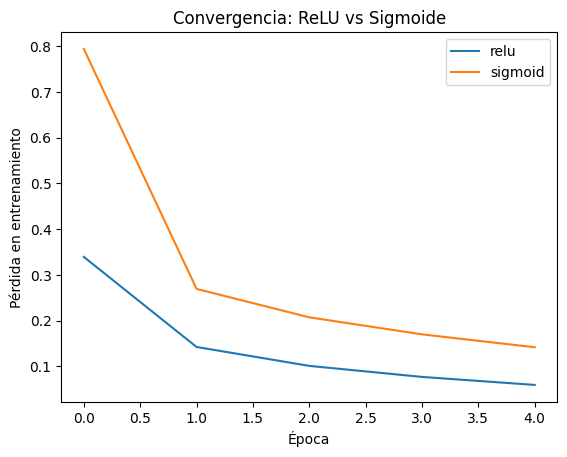

In [44]:
def prueba_activacion(act, ancho=100):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(ancho, activation=act),
        keras.layers.Dense(ancho, activation=act),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Entrenamiento cronometrado
    t0 = time.time()
    history = model.fit(
        datos_entreno,
        epochs=NUMERO_EPOCAS,
        validation_data=datos_validacion,
        verbose=0
    )
    t_total = time.time() - t0
    
    val_acc = history.history['val_accuracy'][-1]
    loss_curve = history.history['loss']
    return {
        'Activación': act,
        'Val_Accuracy': val_acc,
        'Tiempo_s': t_total,
        'Loss_curve': loss_curve
    }

# 2. Ejecutamos para ReLU (original) vs Sigmoide
resultados = []
for act in ['relu', 'sigmoid']:
    resultados.append(prueba_activacion(act))

df = pd.DataFrame([{k:v for k,v in r.items() if k!='Loss_curve'} 
                   for r in resultados])
display(df)

plt.figure()
for r in resultados:
    plt.plot(r['Loss_curve'], label=r['Activación'])
plt.xlabel('Época')
plt.ylabel('Pérdida en entrenamiento')
plt.title('Convergencia: ReLU vs Sigmoide')
plt.legend()
plt.show()

Al aplicar la sigmoide en lugar de ReLU en todas las capas, la precisión de validación cayó de 97.35 % con ReLU a 96.11 % con sigmoide. Es decir, el modelo con activaciones sigmoides rinde 1.24 puntos porcentuales peor sobre el conjunto de validación, lo que indica que ReLU favorece una mejor separación de las clases en MNIST para esta arquitectura.

En cuanto a la velocidad de convergencia, las curvas de pérdida muestran que ReLU reduce rápidamente el error en las primeras épocas (de ~0.34 a ~0.06 en cuatro iteraciones), mientras que sigmoide comienza con un valor mucho más alto (~0.80) y desciende más lentamente (se sitúa en ~0.14 al cabo de cinco épocas). Esto refleja que ReLU facilita gradientes más estables y evita la saturación de la función, mientras que la sigmoide tiende al “apagado” de neuronas y retrasa el aprendizaje.

Por último, el tiempo de entrenamiento total también se ve penalizado ligeramente: la versión ReLU completó las cinco épocas en 3.56 s, mientras que con sigmoide tardó 3.76 s, unos 0.20 s adicionales para el mismo número de iteraciones. 